# **IMPORT LIBRARY**

In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# **GATHERING/LOAD DATA**

In [2]:
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
resp_jabar

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


<Response [200]>

In [3]:
df_cov_jabar = resp_jabar.json()

In [4]:
df = pd.DataFrame(df_cov_jabar['list_perkembangan'])
df.head()

,tanggal,KASUS,MENINGGAL,SEMBUH,DIRAWAT_OR_ISOLASI,AKUMULASI_KASUS,AKUMULASI_SEMBUH,AKUMULASI_MENINGGAL,AKUMULASI_DIRAWAT_OR_ISOLASI
0,1583193600000,1,1,0,0,1,0,1,0
1,1583280000000,1,0,0,1,2,0,1,1
2,1583366400000,1,0,0,1,3,0,1,2
3,1583452800000,1,0,0,1,4,0,1,3
4,1583539200000,0,0,0,0,4,0,1,3


# **ASESSING DATA**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       785 non-null    int64
 1   KASUS                         785 non-null    int64
 2   MENINGGAL                     785 non-null    int64
 3   SEMBUH                        785 non-null    int64
 4   DIRAWAT_OR_ISOLASI            785 non-null    int64
 5   AKUMULASI_KASUS               785 non-null    int64
 6   AKUMULASI_SEMBUH              785 non-null    int64
 7   AKUMULASI_MENINGGAL           785 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  785 non-null    int64
dtypes: int64(9)
memory usage: 55.3 KB


## **Missing Value**

In [6]:
df.isnull().sum()

tanggal                         0
KASUS                           0
MENINGGAL                       0
SEMBUH                          0
DIRAWAT_OR_ISOLASI              0
AKUMULASI_KASUS                 0
AKUMULASI_SEMBUH                0
AKUMULASI_MENINGGAL             0
AKUMULASI_DIRAWAT_OR_ISOLASI    0
dtype: int64

## **Duplicate Data**

In [7]:
df.duplicated().sum()

0

## **Invalid Value**

In [8]:
df.describe()

,tanggal,KASUS,MENINGGAL,SEMBUH,DIRAWAT_OR_ISOLASI,AKUMULASI_KASUS,AKUMULASI_SEMBUH,AKUMULASI_MENINGGAL,AKUMULASI_DIRAWAT_OR_ISOLASI
count,7.850000e+02,785.000000,785.000000,785.000000,785.000000,7.850000e+02,7.850000e+02,785.000000,785.000000
mean,1.617062e+12,1407.814013,20.066242,1383.603822,4.143949,3.556567e+05,3.262525e+05,6167.487898,23236.667516
std,1.959157e+10,2449.723716,45.288172,2576.834658,2224.359573,3.538434e+05,3.343576e+05,6299.716912,35111.290077
min,1.583194e+12,0.000000,0.000000,0.000000,-16558.000000,1.000000e+00,0.000000e+00,1.000000,0.000000
25%,1.600128e+12,67.000000,1.000000,47.000000,-145.000000,1.596400e+04,8.610000e+03,357.000000,1597.000000
50%,1.617062e+12,498.000000,6.000000,472.000000,7.000000,2.507740e+05,2.229490e+05,3257.000000,10453.000000
75%,1.633997e+12,1349.000000,16.000000,1402.000000,181.000000,7.040120e+05,6.874640e+05,14661.000000,29522.000000
max,1.650931e+12,16251.000000,467.000000,22001.000000,13108.000000,1.105134e+06,1.086129e+06,15752.000000,188701.000000


# **CLEANING DATA**

## **Penanganan Invalid Data**

In [9]:
print("jumlah baris negati pada kolom 'DIRAWAT_OR_ISOLASI' adalah ", (df['DIRAWAT_OR_ISOLASI']<0).sum())


jumlah baris negati pada kolom 'DIRAWAT_OR_ISOLASI' adalah  347


In [10]:
df = df.drop(columns={
    'DIRAWAT_OR_ISOLASI',
    'AKUMULASI_DIRAWAT_OR_ISOLASI'
})
df.head()

,tanggal,KASUS,MENINGGAL,SEMBUH,AKUMULASI_KASUS,AKUMULASI_SEMBUH,AKUMULASI_MENINGGAL
0,1583193600000,1,1,0,1,0,1
1,1583280000000,1,0,0,2,0,1
2,1583366400000,1,0,0,3,0,1
3,1583452800000,1,0,0,4,0,1
4,1583539200000,0,0,0,4,0,1


Pada proses assessing data, terdapat keanehan data karena nilainya ada negatif. Untuk mencari tahu berapa banyak nilai yang negatif, maka kita hitung terlebih dahulu untuk memutuskan tindakan yang tepat.

 Terlihat bahwa ada 347 data yang bernilai negatif pada kolom 'DIRAWAT_OR_ISOLASI'. Data tersebut cukup banyak, hampir 50% dari data keseluruhan. Jika dihapus, maka jumlah data yang akan di proses hanya 50% dari data awalnya. Sehingga saya memutuskan untuk menghapus kolomnya saja. Karena ada kolom yang terikat dengan kolom 'DIRAWAT_OR_ISOLASI', maka saya memutuskan untuk menghapus kedua kolom tersebut

In [11]:
df.describe()

,tanggal,KASUS,MENINGGAL,SEMBUH,AKUMULASI_KASUS,AKUMULASI_SEMBUH,AKUMULASI_MENINGGAL
count,7.850000e+02,785.000000,785.000000,785.000000,7.850000e+02,7.850000e+02,785.000000
mean,1.617062e+12,1407.814013,20.066242,1383.603822,3.556567e+05,3.262525e+05,6167.487898
std,1.959157e+10,2449.723716,45.288172,2576.834658,3.538434e+05,3.343576e+05,6299.716912
min,1.583194e+12,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,1.000000
25%,1.600128e+12,67.000000,1.000000,47.000000,1.596400e+04,8.610000e+03,357.000000
50%,1.617062e+12,498.000000,6.000000,472.000000,2.507740e+05,2.229490e+05,3257.000000
75%,1.633997e+12,1349.000000,16.000000,1402.000000,7.040120e+05,6.874640e+05,14661.000000
max,1.650931e+12,16251.000000,467.000000,22001.000000,1.105134e+06,1.086129e+06,15752.000000


## **Mengubah Nama Kolom**

In [12]:
df.columns = df.columns.str.lower()
df.head()

,tanggal,kasus,meninggal,sembuh,akumulasi_kasus,akumulasi_sembuh,akumulasi_meninggal
0,1583193600000,1,1,0,1,0,1
1,1583280000000,1,0,0,2,0,1
2,1583366400000,1,0,0,3,0,1
3,1583452800000,1,0,0,4,0,1
4,1583539200000,0,0,0,4,0,1


## **Mengubah Format Tanggal**

In [13]:
df['tanggal'] = pd.to_datetime(df["tanggal"]*1e6, unit='ns')
df.head()

,tanggal,kasus,meninggal,sembuh,akumulasi_kasus,akumulasi_sembuh,akumulasi_meninggal
0,2020-03-03,1,1,0,1,0,1
1,2020-03-04,1,0,0,2,0,1
2,2020-03-05,1,0,0,3,0,1
3,2020-03-06,1,0,0,4,0,1
4,2020-03-07,0,0,0,4,0,1


# **EXPLORATORY DATA ANALYSIS**

## **Bagaimana Perkembangan Kasus Baru Setiap Hari?**

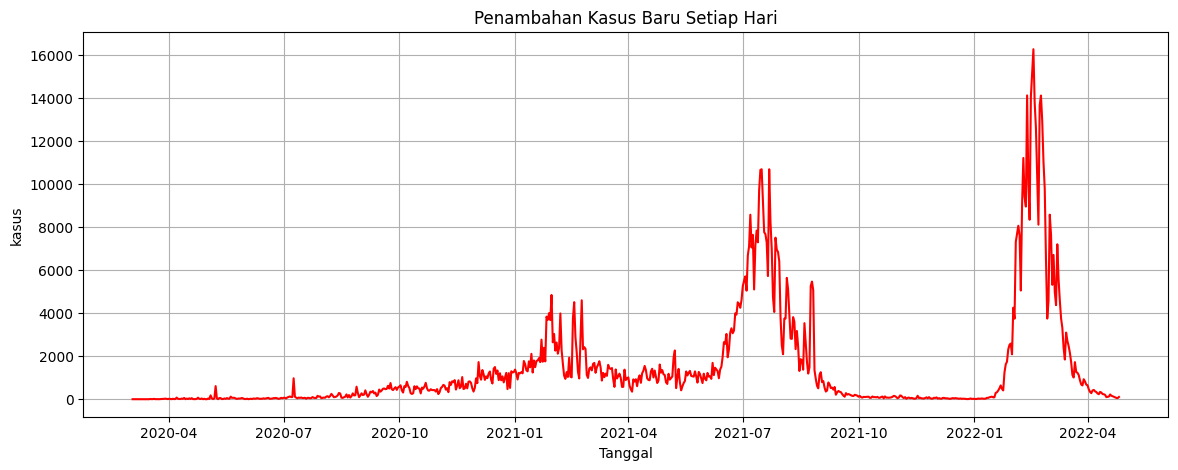

In [14]:
plt.figure(figsize=(14,5))
plt.plot(df['tanggal'], df['kasus'], color='red')
plt.xlabel('Tanggal')
plt.ylabel('kasus')
plt.title('Penambahan Kasus Baru Setiap Hari')
plt.grid()
plt.show()

## **Bagaimana Perkembangan Kasus Sembuh Setiap Hari?**

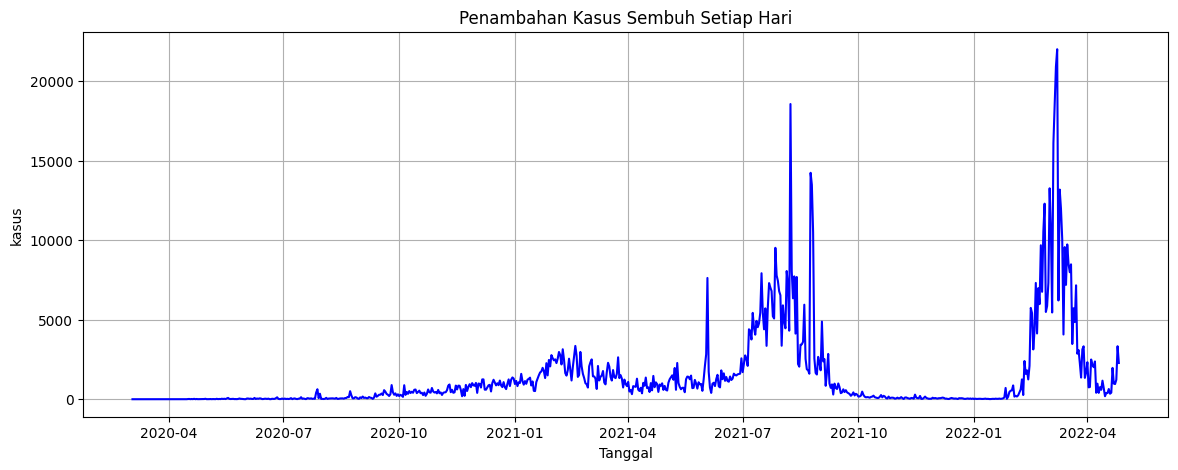

In [15]:
plt.figure(figsize=(14,5))
plt.plot(df['tanggal'], df['sembuh'], color='blue')
plt.xlabel('Tanggal')
plt.ylabel('kasus')
plt.title('Penambahan Kasus Sembuh Setiap Hari')
plt.grid()
plt.show()

## **Bagaimana Perkembangan Kasus Meninggal Setiap Hari?**

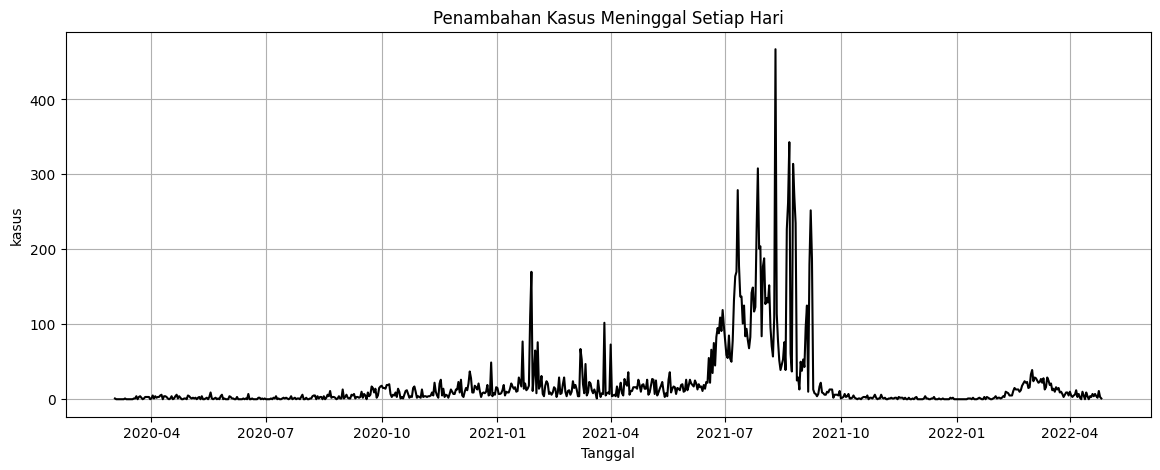

In [16]:
plt.figure(figsize=(14,5))
plt.plot(df['tanggal'], df['meninggal'], color='black')
plt.xlabel('Tanggal')
plt.ylabel('kasus')
plt.title('Penambahan Kasus Meninggal Setiap Hari')
plt.grid()

plt.show()

## **Bagaimana Perbandingan Akumlasi Kasus Baru, Sembuh, dan Meninggal?**

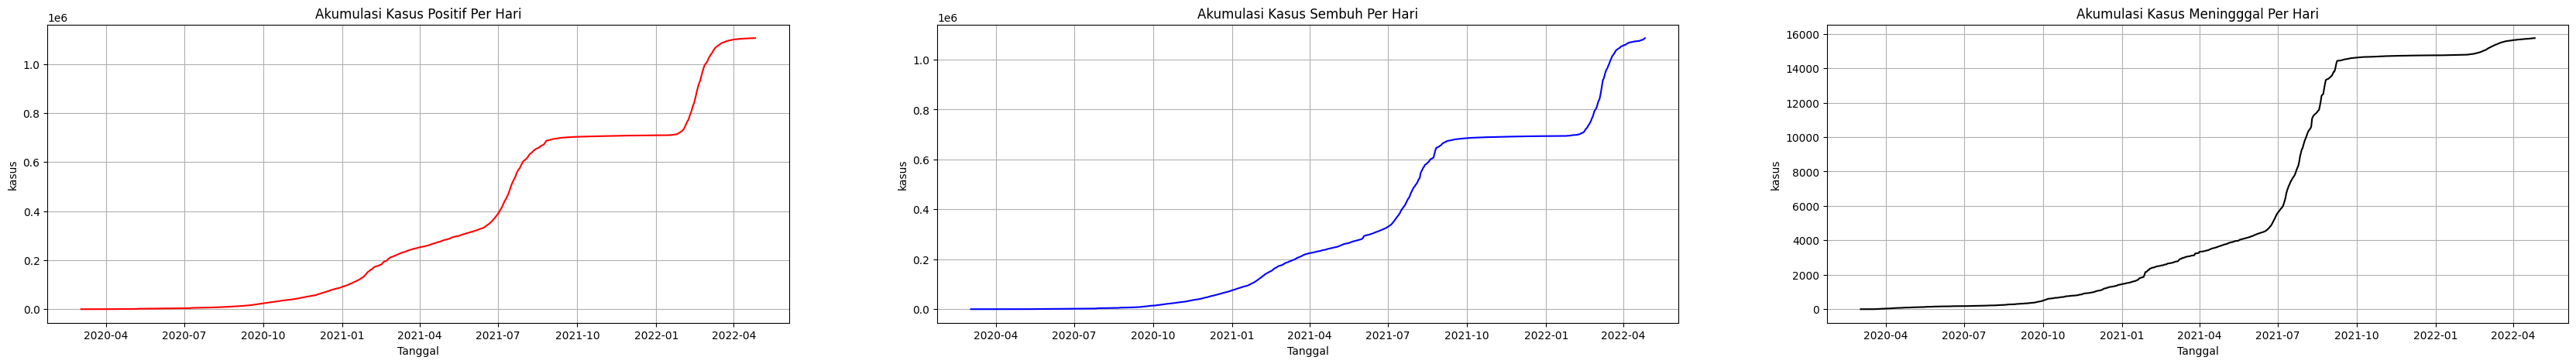

In [17]:
plt.figure(figsize=(42,5))

plt.subplot(1,3,1)
plt.plot(df['tanggal'], df['akumulasi_kasus'], color='red')
plt.xlabel('Tanggal')
plt.ylabel('kasus')
plt.title('Akumulasi Kasus Positif Per Hari')
plt.grid()

plt.subplot(1,3,2)
plt.plot(df['tanggal'], df['akumulasi_sembuh'], color='blue')
plt.xlabel('Tanggal')
plt.ylabel('kasus')
plt.title('Akumulasi Kasus Sembuh Per Hari')
plt.grid()


plt.subplot(1,3,3)
plt.plot(df['tanggal'], df['akumulasi_meninggal'], color='black')
plt.xlabel('Tanggal')
plt.ylabel('kasus')
plt.title('Akumulasi Kasus Meningggal Per Hari')
plt.grid()

plt.show()

## **Bagaimana Persentase Kasus Meninggal dan Kasus Sembuh**

In [18]:
total_kasus = df.at[df.index[-1], 'akumulasi_kasus']
total_sembuh = df.at[df.index[-1], 'akumulasi_sembuh']
total_meninggal = df.at[df.index[-1], 'akumulasi_meninggal']

persentase_meninggal = total_meninggal/total_kasus * 100
persentase_sembuh = total_sembuh/total_kasus * 100

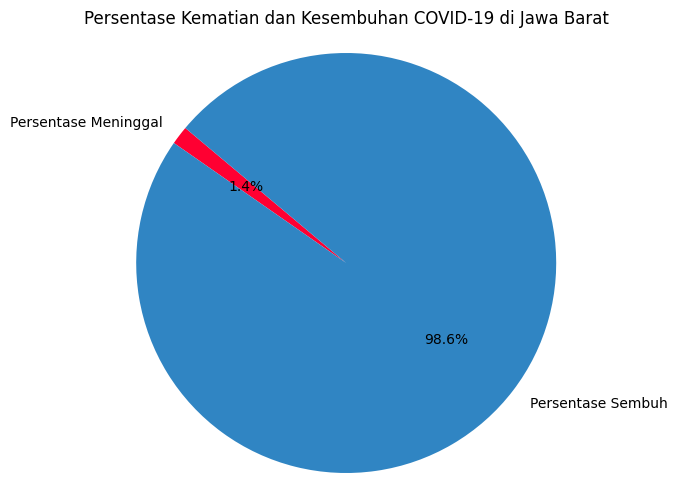

In [19]:
x = [persentase_meninggal, persentase_sembuh]
labels = ['Persentase Meninggal', 'Persentase Sembuh']
colors = ('#FF0032', '#3085C3')

plt.figure(figsize=(8, 6))
plt.pie(x, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140,textprops={'fontsize': 10})
plt.title('Persentase Kematian dan Kesembuhan COVID-19 di Jawa Barat')
plt.axis('equal')
plt.show()

# **KESIMPULAN**

1. Pelonjakan kasus baru dibagi menjadi 3 gelombang.
  - Gelombang pertama terjadi antar bulan Januari 2021 sampai April 2021. Pada gelombang pertama, penambahan kasus per hari mencapai 5000 kasus.
  - Gelombang kedua terjadi antara bulan Juni 2021 sampai Oktober 2021. Penambahan kasus pada gelombang kedua, mencapai 11000 kasus perhari.
  - Gelombang ketiga terjadi antara bulan Januari 2022 sampai April 2022. Gelombang ketiga ini merupakan penambahan kasus harian paling tinggi dalam setahun, yaitu mencapai 16000 per hari.

2. Pelonjakan kasus sembuh pada periode ini juga dibagi menjadi 3 gelombang.
  - Gelombang pertama terjadi antara bulan januari 2021 sampai April 2021. Dimana total kasus sembuh sekitar 2500 per hari.
  - Gelombang kedua terjadi antara bulan Mei 2021 - Oktober 2021. Pada gelombang kedua, penambahan kasus sembuh puncaknya mencapai 18000 kasus per hari.
  - Gelombang ketiga terjadi antara bulan Februari 2022 sampai April 2022. Gelombang ketiga ini merupakan pelonjakan kasus sembuh terbanyak yaitu mencapai puncak sekitar 23000 kasus sembuh per hari

3. Kasus kematian akibat COVID-19 di Jawa Barat relatif rendah dibandingkan penambahan kasus semubuh. Puncak gelombang kasus kematian terjadi antara bulan Juli 2021 sampai Oktober 2021, yaitu mencapai 450 kasus meninggal per hari.

4. Akumulasi penambahan kasus baru pada periode ini, mulai konstan (penambahan kasus sudah sedikit) mulai pada bulan April 2022. Akumulasi penambahan kasus sembuh meningkat dari Februari 2021 sampai April 2022. Namun di akhir gambar grafik, terlihat bahwa grafik mulai naik kembali. Sedangkan akumulasi penambahan kasus meninggal mulai konstan (penambahan kasus meninggal semakin sedikit) sekitar bulan Maret 2022.

5. Persentase kasus sembuh relatif besar dibandingkan persentase kasus meninggal pada periode ini. Kasus sembuh mencapai 98.6% dan kasus meninggal hanya 1.4%.




# **SIMPAN DATASET YANG BERSIH**

In [20]:
df.to_csv("covid19_jabar_clean.csv", index=False)